In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

%matplotlib inline

# DBSCAN with Multiple Data Sets

Read [here](https://www.aaai.org/Papers/KDD/1996/KDD96-037.pdf) if math excites you.

## Dataset 1

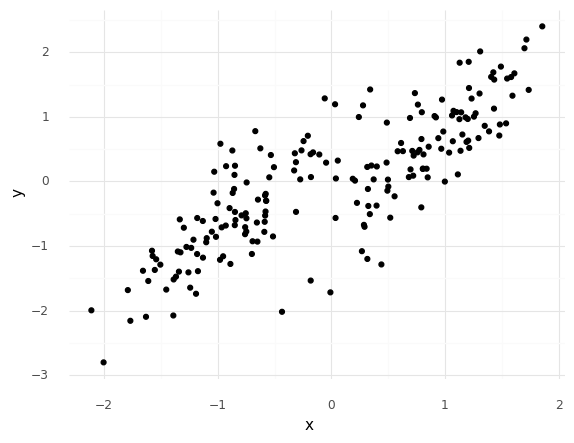

<ggplot: (84701164936)>

In [2]:
d1 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM1.csv")

z = StandardScaler()
d1[["x","y"]] = z.fit_transform(d1)

ggplot(d1, aes(x = "x", y = "y")) + geom_point() + theme_minimal()

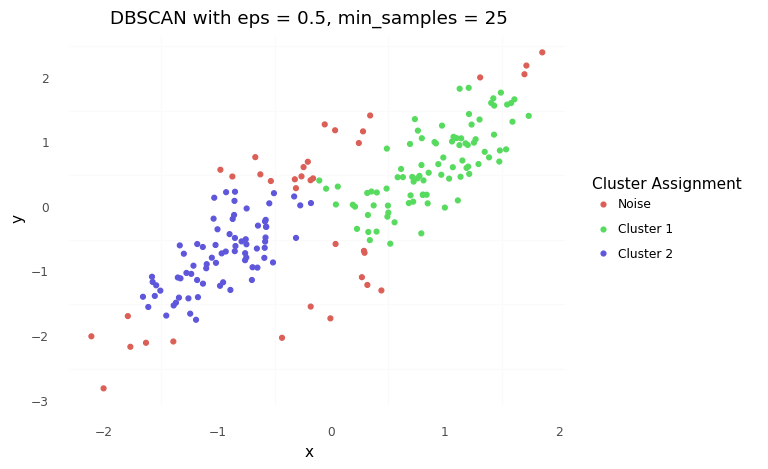

<ggplot: (84710346743)>

In [3]:
# dbscan and plot
db1 = DBSCAN(eps = 0.5, min_samples = 25).fit(d1)

labsList = ["Noise"]
labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(db1.labels_)))]

d1["assignments"] = db1.labels_

(ggplot(d1, aes(x = "x", y = "y", color = "factor(assignments)")) +
 geom_point() +
 theme_minimal() +
 scale_color_discrete(name = "Cluster Assignment",
                      labels = labsList) +
theme(panel_grid_major = element_blank()) +
labs(title = "DBSCAN with eps = 0.5, min_samples = 25"))

In [4]:
# grab only clustered data points
d1_clustered = d1.loc[(d1.assignments >= 0)]

silhouette_score(d1_clustered[["x","y"]], d1_clustered["assignments"])

0.6169609560667532

In [5]:
# overall 
silhouette_score(d1[["x","y"]], d1["assignments"])

0.39760284702143056

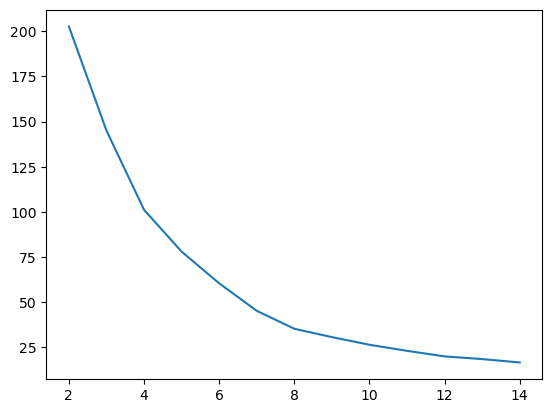

In [6]:
import matplotlib.pyplot as plt
cl=[]
x =[]
for k in range(2,15):
    kmeans = KMeans(n_clusters=k, max_iter=50)
    kmeans.fit(d1)
    cl.append(kmeans.inertia_)
    x. append(k)
plt.plot(x,cl)

In [7]:
silhouette_score(d1[["x","y"]], kmeans.fit_predict(d1))

0.37619485686484194

[1 7 3 3 3 7 1 7 1 7 1 1 6 7 7 3 7 0 6 1 7 6 7 1 1 7 7 6 3 7 3 3 1 7 3 6 7
 7 6 3 3 7 3 7 6 3 7 1 7 3 3 7 1 3 3 3 3 3 6 3 7 3 3 1 7 1 3 1 3 3 7 7 3 7
 7 3 3 3 7 7 1 3 3 7 7 3 7 7 3 3 1 7 3 1 7 7 7 6 3 3 5 4 2 2 0 0 0 0 0 4 0
 2 4 4 4 4 4 2 4 0 4 0 0 0 4 4 4 4 0 2 4 4 0 0 4 0 7 4 4 0 0 2 2 7 0 2 2 4
 4 0 0 4 0 4 2 0 0 4 0 0 4 4 4 5 4 2 2 4 5 4 4 4 4 4 0 7 4 0 2 2 2 5 0 4 4
 4 2 0 5 4 0 4 0 2 4 0 4 4 4 5]


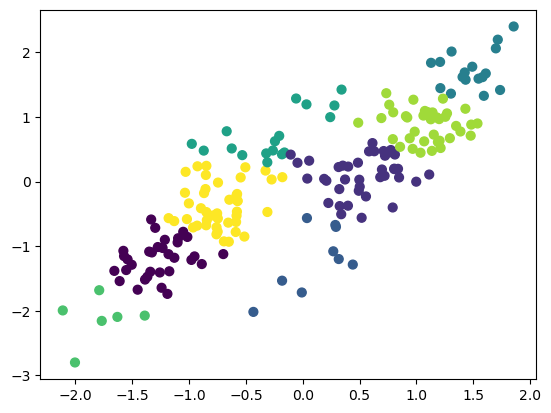

In [8]:

kmeans = KMeans(n_clusters=8, max_iter=50)
kmeans.fit(d1)

print(kmeans.fit_predict(d1))
plt.scatter(d1["x"],d1["y"], c=kmeans.fit_predict(d1), s=40, cmap='viridis')


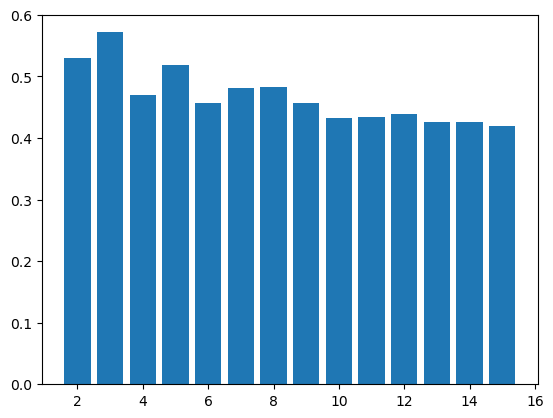

In [9]:
#training
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
silhouette_scores = [] 

for k in range(2, 16):
    silhouette_scores.append( 
        silhouette_score(d1, AgglomerativeClustering(n_clusters = k).fit_predict(d1))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7,8,9,10,11,12,13,14,15] 
plt.bar(k, silhouette_scores) 
plt.show() 



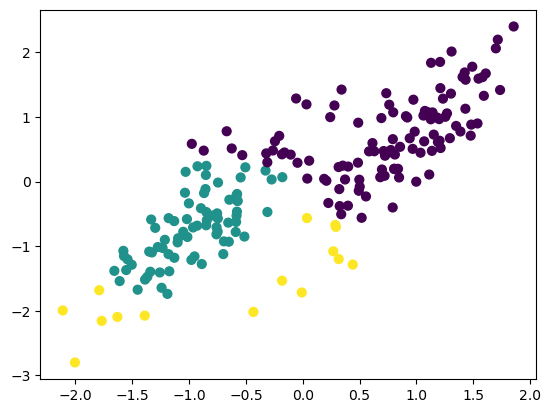

0.5718084297411344


In [10]:
agg=AgglomerativeClustering(n_clusters = 3)
plt.scatter(d1["x"],d1["y"], c=agg.fit_predict(d1), s=40, cmap='viridis')
plt.show()
print(silhouette_score(d1, AgglomerativeClustering(n_clusters = 3).fit_predict(d1)))
# the best one


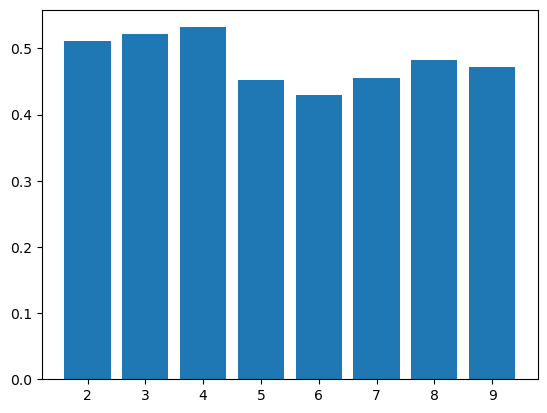

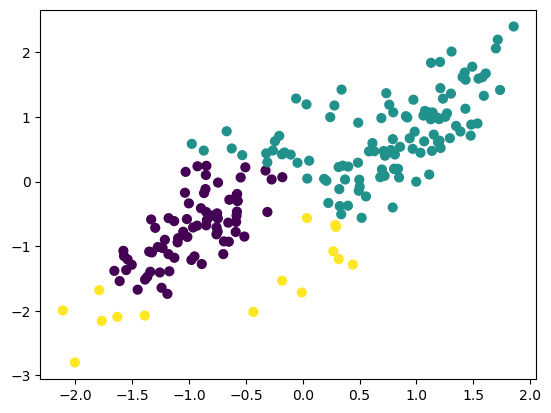

0.5718084297411344

In [11]:
from sklearn.mixture import GaussianMixture
silhouette_scores2 =[]
ks = [] 
for k in range(2,10) :
    gmm = GaussianMixture(n_components=k)
    gmm.fit(d1)
    labels = gmm.predict(d1)
    silhouette_scores2.append( 
        silhouette_score(d1,labels )) 
    ks.append(k)
    
# Plotting a bar graph to compare the results 
k = [] 
plt.bar(ks, silhouette_scores2) 
plt.show()
gmm = GaussianMixture(n_components=3)
gmm.fit(d1)
labels = gmm.predict(d1)
plt.scatter(d1["x"],d1["y"], c=labels, s=40, cmap='viridis')
plt.show()
silhouette_score(d1,labels )


## Dataset 2

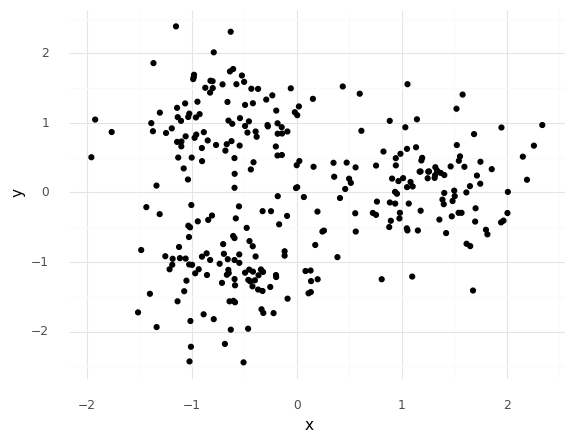

<ggplot: (84717703205)>

In [86]:
d2 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM2.csv")
db2 =d2.copy()
z = StandardScaler()
db2[["x","y"]] = z.fit_transform(db2)

ggplot(d2, aes(x = "x", y = "y")) + geom_point() + theme_minimal()

In [87]:
d2

,x,y
0,1.578527,1.408111
1,1.748206,0.441915
2,1.523151,0.681521
3,1.318949,0.362971
4,0.977164,-0.373589
...,...,...
295,-0.522015,1.682249
296,-0.195039,1.177602
297,0.004994,1.111269
298,-1.954443,0.506557


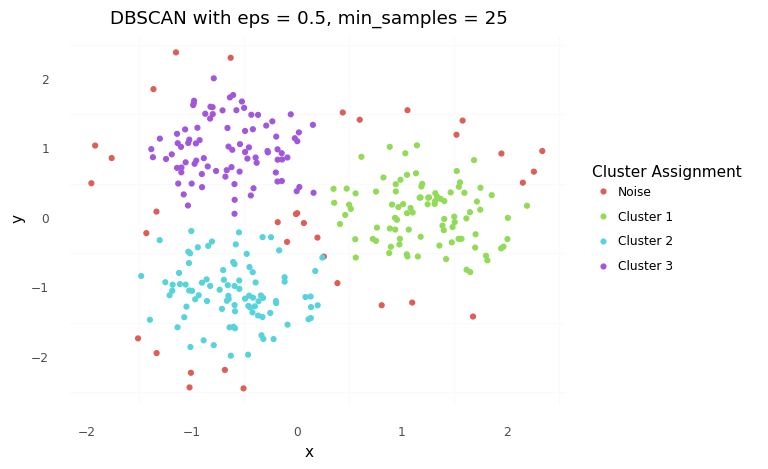

<ggplot: (84717855862)>

In [94]:
db2 = DBSCAN(eps = 0.5, min_samples = 25).fit(d2)

labsList = ["Noise"]
labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(db2.labels_)))]

d2["assignments"] = db2.labels_
(ggplot(d2, aes(x = "x", y = "y", color = "factor(assignments)")) +
 geom_point() +
 theme_minimal() +
 scale_color_discrete(name = "Cluster Assignment",
                      labels = labsList) +
theme(panel_grid_major = element_blank()) +
labs(title = "DBSCAN with eps = 0.5, min_samples = 25"))

In [97]:
# grab only clustered data points
d2_clustered = d2.loc[(d2.assignments >= 0)]

print(silhouette_score(d2_clustered[["x","y"]], d2_clustered["assignments"]))

# overall 
print(silhouette_score(d2[["x","y"]], d2["assignments"]))

0.6110383207373055
0.4850081443739663


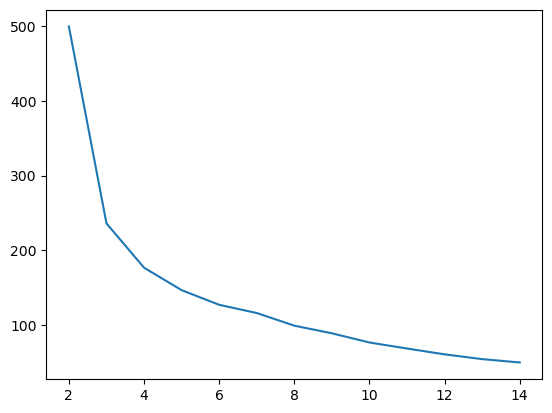

In [77]:
c2=[]
x =[]
for k in range(2,15):
    kmeans = KMeans(n_clusters=k, max_iter=50)
    kmeans.fit(d2)
    c2.append(kmeans.inertia_)
    x. append(k)
plt.plot(x,c2)

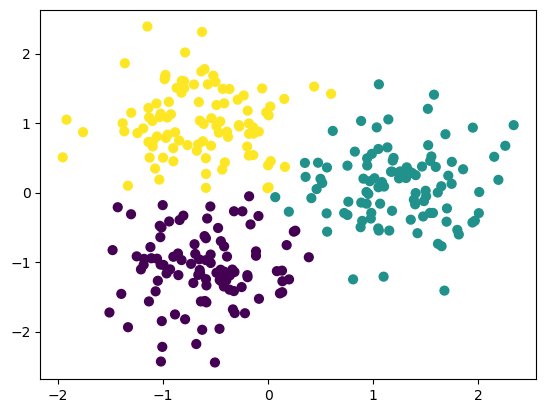

In [90]:
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(d2)

plt.scatter(d2["x"],d2["y"], c=kmeans.fit_predict(d2), s=40, cmap='viridis')


In [79]:

silhouette_score(d2[["x","y"]], kmeans.fit_predict(d2))

0.514937358938812

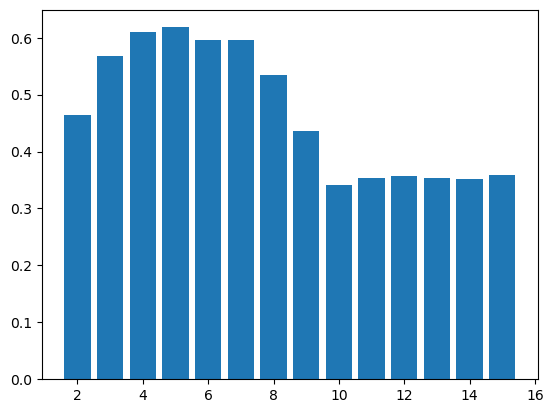

In [80]:
#training
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
silhouette_scores = [] 

for k in range(2, 16):
    silhouette_scores.append( 
        silhouette_score(d2, AgglomerativeClustering(n_clusters = k).fit_predict(d2))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7,8,9,10,11,12,13,14,15] 
plt.bar(k, silhouette_scores) 
plt.show() 

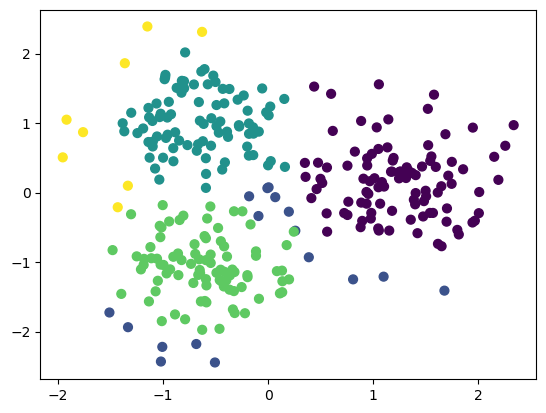

0.6183243597816823


In [81]:
agg=AgglomerativeClustering(n_clusters = 5)
plt.scatter(d2["x"],d2["y"], c=agg.fit_predict(d2), s=40, cmap='viridis')
plt.show()
print(silhouette_score(d2, AgglomerativeClustering(n_clusters = 5).fit_predict(d2)))
# the best one

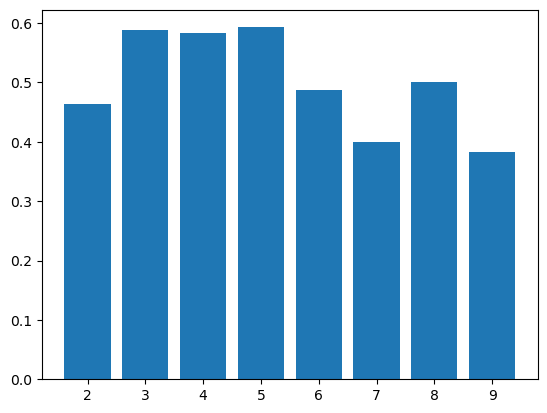

In [82]:
from sklearn.mixture import GaussianMixture
silhouette_scores2 =[]
ks = []  
for k in range(2,10) :
    gmm = GaussianMixture(n_components=k)
    gmm.fit(d2)
    labels = gmm.predict(d2)
    silhouette_scores2.append( 
        silhouette_score(d2,labels )) 
    ks.append(k)
    # Plotting a bar graph to compare the results 
k = [] 
plt.bar(ks, silhouette_scores2) 
plt.show()

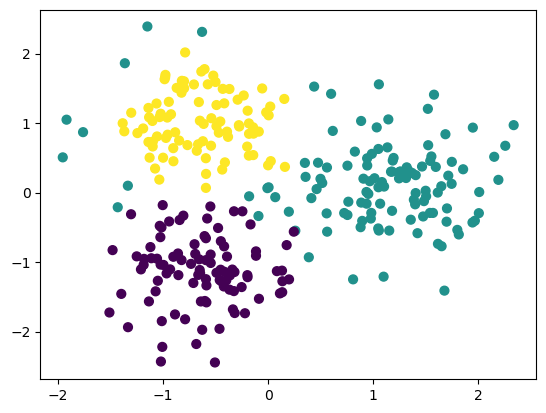

0.5880280203482798

In [83]:
gmm = GaussianMixture(n_components=3)
gmm.fit(d2)
labels = gmm.predict(d2)
plt.scatter(d2["x"],d2["y"], c=labels, s=40, cmap='viridis')
plt.show()
silhouette_score(d2,labels )

## Dataset 3

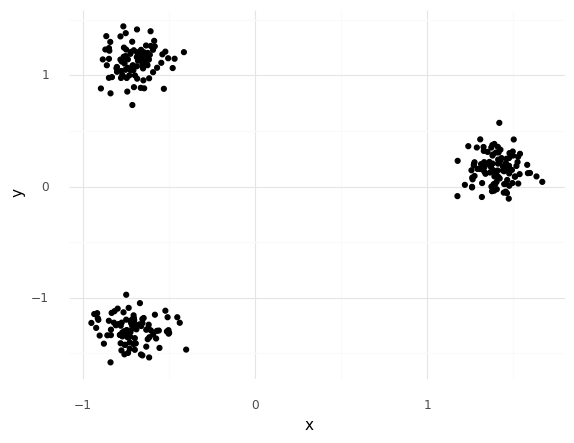

<ggplot: (84711700465)>

In [22]:
d3 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM3.csv")

z = StandardScaler()
d3[["x","y"]] = z.fit_transform(d3)

ggplot(d3, aes(x = "x", y = "y")) + geom_point() + theme_minimal()

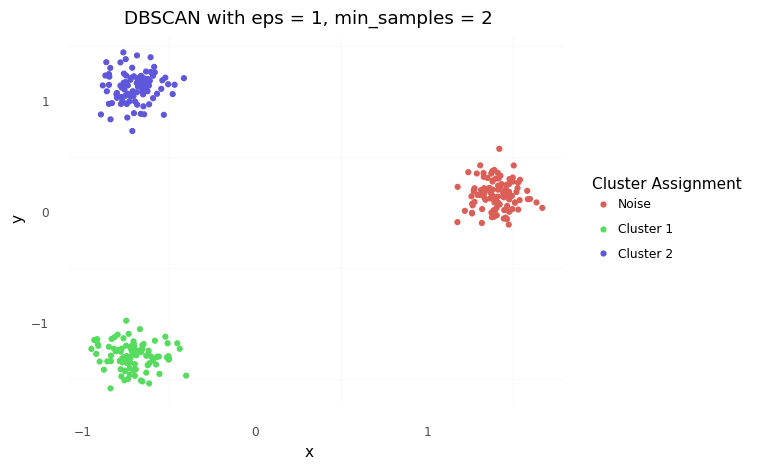

<ggplot: (84709710728)>

In [23]:
db3 = DBSCAN(eps = 1, min_samples = 2).fit(d3)

labsList = ["Noise"]
labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(db3.labels_)))]

d3["assignments"] = db3.labels_

(ggplot(d3, aes(x = "x", y = "y", color = "factor(assignments)")) +
 geom_point() +
 theme_minimal() +
 scale_color_discrete(name = "Cluster Assignment",
                      labels = labsList) +
theme(panel_grid_major = element_blank()) +
labs(title = "DBSCAN with eps = 1, min_samples = 2"))

In [24]:
# grab only clustered data points
d3_clustered = d3.loc[(d3.assignments >= 0)]

print(silhouette_score(d3_clustered[["x","y"]], d3_clustered["assignments"]))

# overall 
print(silhouette_score(d3[["x","y"]], d3["assignments"]))

0.913619050733588
0.913619050733588


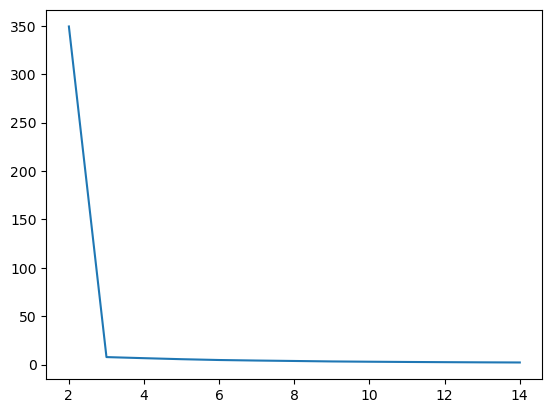

In [25]:
c3=[]
x =[]
for k in range(2,15):
    kmeans = KMeans(n_clusters=k, max_iter=50)
    kmeans.fit(d3)
    c3.append(kmeans.inertia_)
    x. append(k)
plt.plot(x,c3)

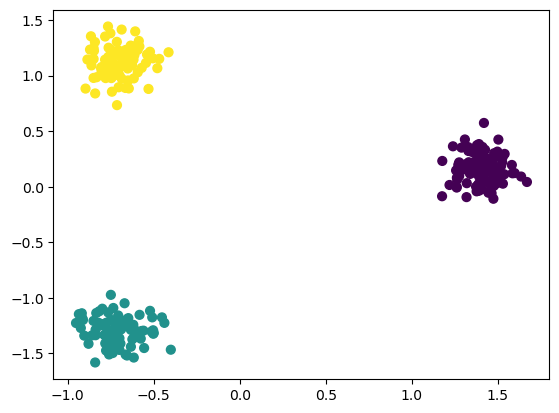

0.913619050733588

In [26]:
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(d3)

plt.scatter(d3["x"],d3["y"], c=kmeans.fit_predict(d3), s=40, cmap='viridis')
plt.show()
silhouette_score(d3[["x","y"]], kmeans.fit_predict(d3))

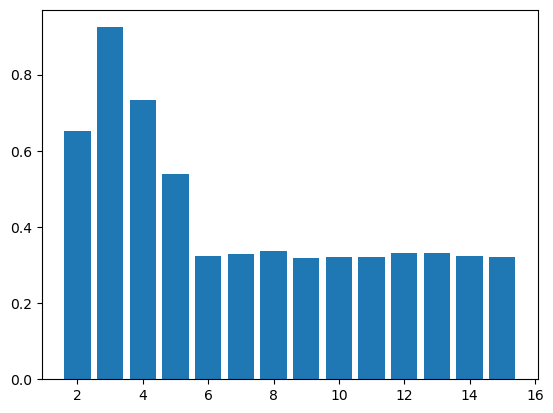

In [27]:
#training
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
silhouette_scores = [] 

for k in range(2, 16):
    silhouette_scores.append( 
        silhouette_score(d3, AgglomerativeClustering(n_clusters = k).fit_predict(d3))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7,8,9,10,11,12,13,14,15] 
plt.bar(k, silhouette_scores) 
plt.show() 

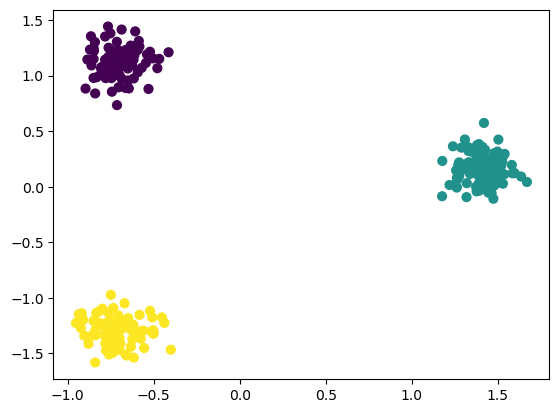

0.9239911374087171


In [28]:
agg=AgglomerativeClustering(n_clusters = 3)
plt.scatter(d3["x"],d3["y"], c=agg.fit_predict(d3), s=40, cmap='viridis')
plt.show()
print(silhouette_score(d3, AgglomerativeClustering(n_clusters = 3).fit_predict(d3)))

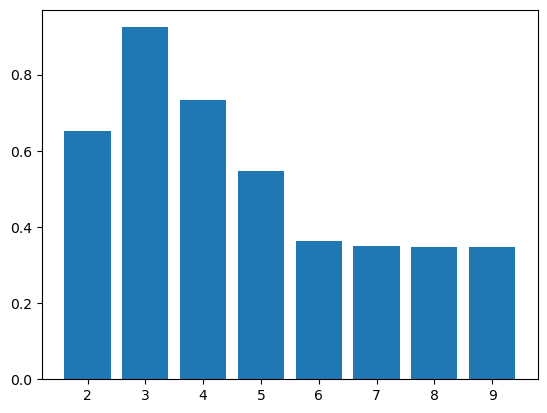

In [29]:
from sklearn.mixture import GaussianMixture
silhouette_scores2 =[]
ks = []  
for k in range(2,10) :
    gmm = GaussianMixture(n_components=k)
    gmm.fit(d3)
    labels = gmm.predict(d3)
    silhouette_scores2.append( 
        silhouette_score(d3,labels )) 
    ks.append(k)
# Plotting a bar graph to compare the results 
k = [] 
plt.bar(ks, silhouette_scores2) 
plt.show()

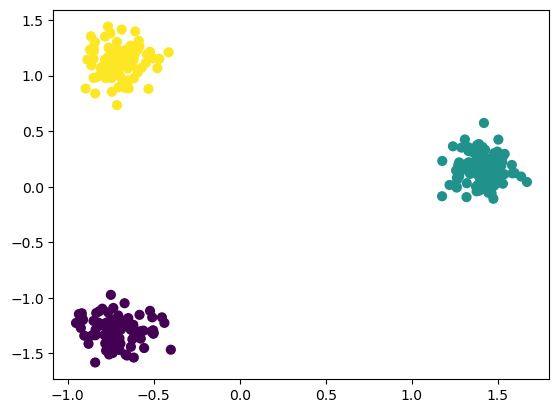

0.9239911374087171

In [30]:
gmm = GaussianMixture(n_components=3)
gmm.fit(d3)
labels = gmm.predict(d3)
plt.scatter(d3["x"],d3["y"], c=labels, s=40, cmap='viridis')
plt.show()
silhouette_score(d3,labels )

## Dataset 4

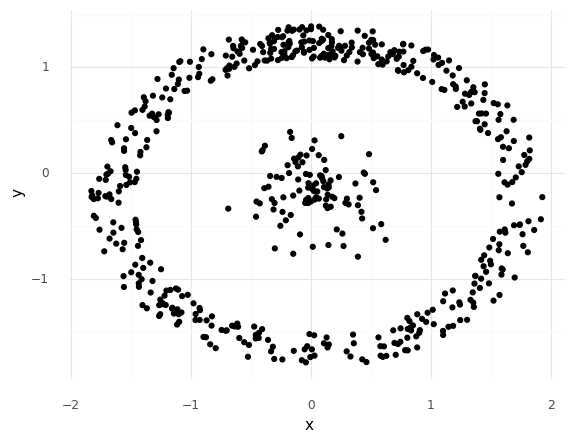

<ggplot: (84714124424)>

In [31]:
d4 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM4.csv")

z = StandardScaler()
d4[["x","y"]] = z.fit_transform(d4)

ggplot(d4, aes(x = "x", y = "y")) + geom_point() + theme_minimal()

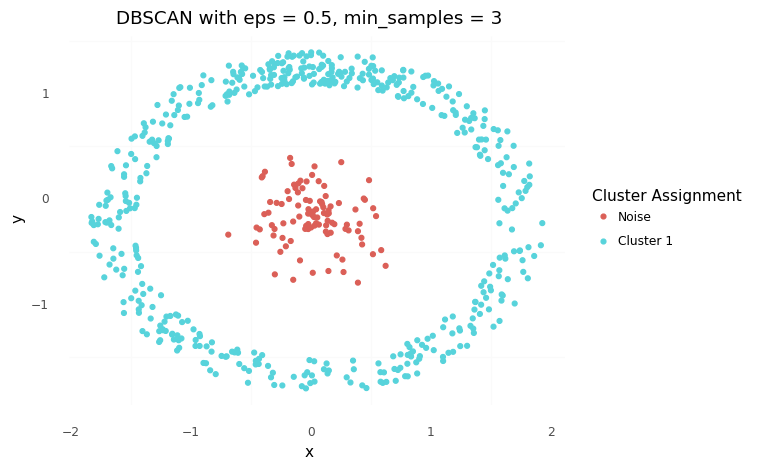

<ggplot: (84714160851)>

In [32]:
db4 = DBSCAN(eps = 0.5, min_samples = 3).fit(d4)

labsList = ["Noise"]
labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(db4.labels_)))]

d4["assignments"] = db4.labels_

(ggplot(d4, aes(x = "x", y = "y", color = "factor(assignments)")) +
 geom_point() +
 theme_minimal() +
 scale_color_discrete(name = "Cluster Assignment",
                      labels = labsList) +
theme(panel_grid_major = element_blank()) +
labs(title = "DBSCAN with eps = 0.5, min_samples = 3"))

In [33]:
# grab only clustered data points
d4_clustered = d4.loc[(d4.assignments >= 0)]

print(silhouette_score(d4_clustered[["x","y"]], d4_clustered["assignments"]))

# overall 
print(silhouette_score(d4[["x","y"]], d4["assignments"]))

-0.042911477754913246
-0.042911477754913246


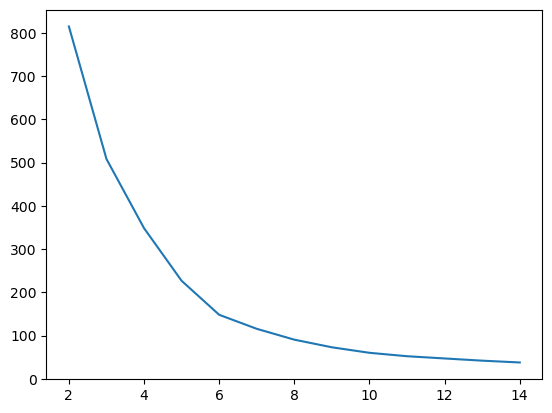

In [34]:
c4=[]
x =[]
for k in range(2,15):
    kmeans = KMeans(n_clusters=k, max_iter=50)
    kmeans.fit(d4)
    c4.append(kmeans.inertia_)
    x. append(k)
plt.plot(x,c4)

0.4941629336300523

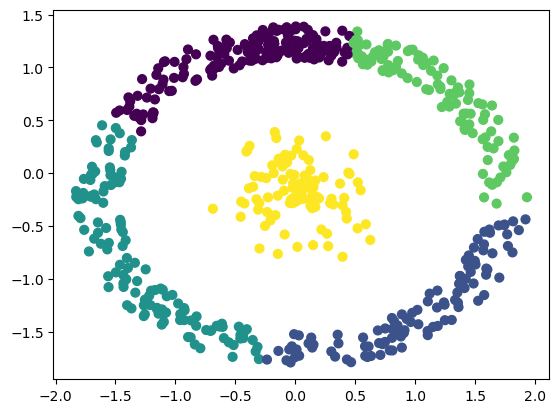

In [35]:
kmeans = KMeans(n_clusters=5, max_iter=50)
kmeans.fit(d4)

plt.scatter(d4["x"],d4["y"], c=kmeans.fit_predict(d4), s=40, cmap='viridis')
silhouette_score(d4[["x","y"]], kmeans.fit_predict(d4))

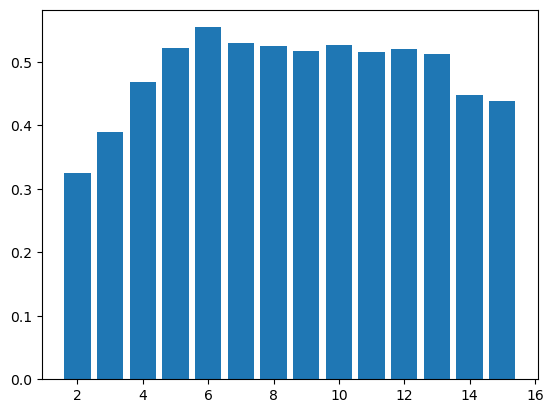

In [36]:
#training
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
silhouette_scores = [] 

for k in range(2, 16):
    silhouette_scores.append( 
        silhouette_score(d4, AgglomerativeClustering(n_clusters = k).fit_predict(d4))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7,8,9,10,11,12,13,14,15] 
plt.bar(k, silhouette_scores) 
plt.show() 

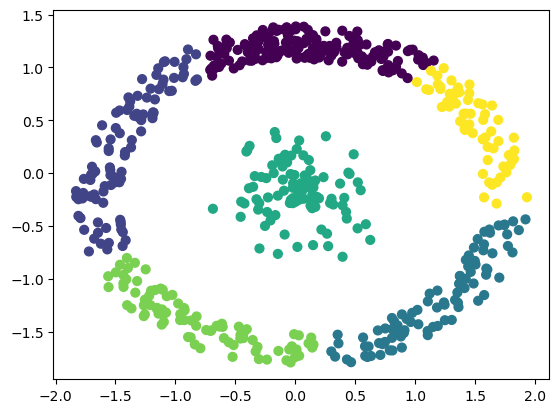

0.5543023122856181


In [37]:
agg=AgglomerativeClustering(n_clusters = 6)
plt.scatter(d4["x"],d4["y"], c=agg.fit_predict(d4), s=40, cmap='viridis')
plt.show()
print(silhouette_score(d4, AgglomerativeClustering(n_clusters = 6).fit_predict(d4)))

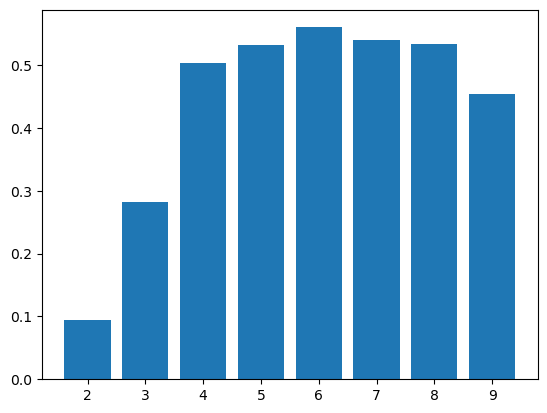

In [38]:
from sklearn.mixture import GaussianMixture
silhouette_scores2 =[]
ks = []  
for k in range(2,10) :
    gmm = GaussianMixture(n_components=k)
    gmm.fit(d4)
    labels = gmm.predict(d4)
    silhouette_scores2.append( 
        silhouette_score(d4,labels )) 
    ks.append(k)
    # Plotting a bar graph to compare the results 
k = [] 
plt.bar(ks, silhouette_scores2) 
plt.show()

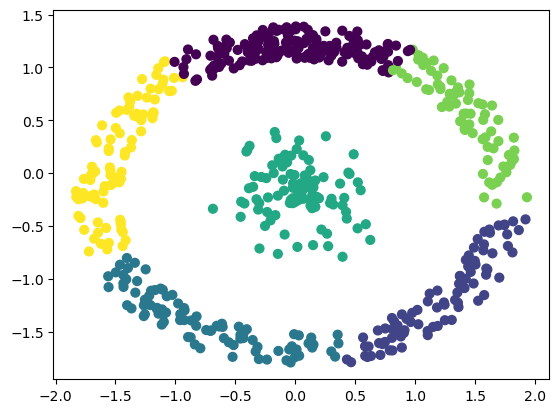

0.5590454522615486

In [39]:
gmm = GaussianMixture(n_components=6)
gmm.fit(d4)
labels = gmm.predict(d4)
plt.scatter(d4["x"],d4["y"], c=labels, s=40, cmap='viridis')
plt.show()
silhouette_score(d4,labels )

### Compare

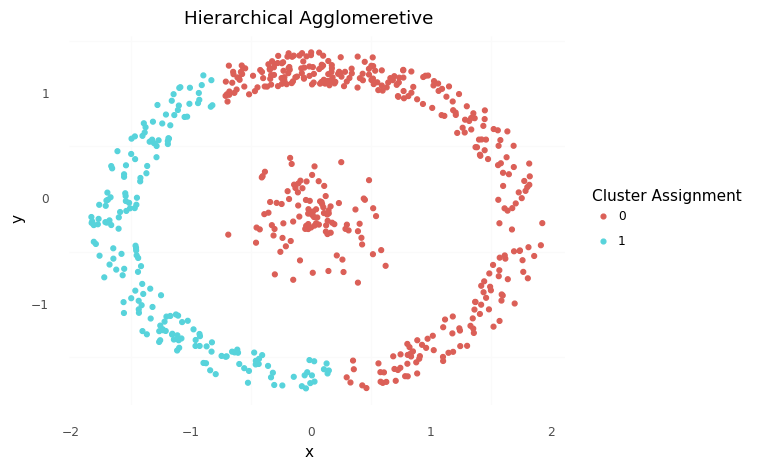

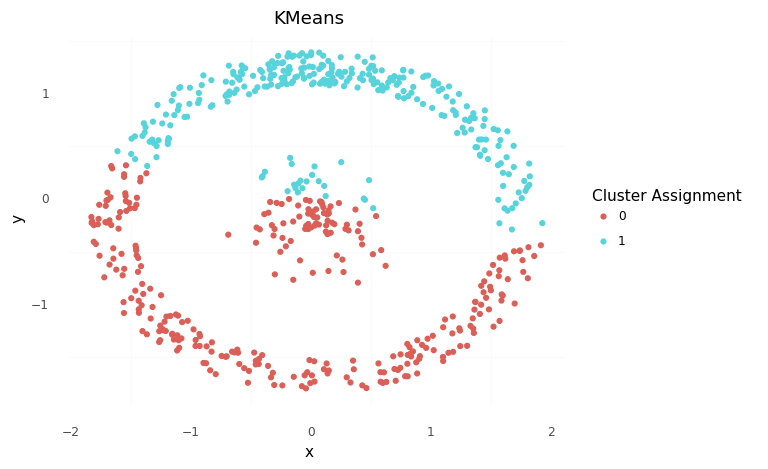

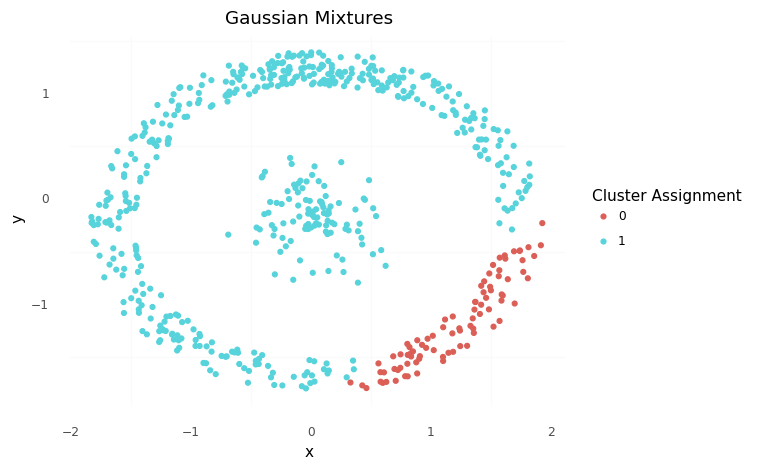

In [40]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

hac = AgglomerativeClustering(2)
km = KMeans(2)
gm = GaussianMixture(2)

hac.fit(d4[["x","y"]])
km.fit(d4[["x","y"]])
gm.fit(d4[["x","y"]])

d4["hac"] = hac.labels_
d4["km"] = km.labels_
d4["gm"] = gm.predict(d4[["x","y"]])


print(ggplot(d4, aes(x = "x", y = "y",
                    color = "factor(hac)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "Hierarchical Agglomeretive"))


print(ggplot(d4, aes(x = "x", y = "y",
                    color = "factor(km)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "KMeans"))


print(ggplot(d4, aes(x = "x", y = "y",
                    color = "factor(gm)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "Gaussian Mixtures"))

## Dataset 5

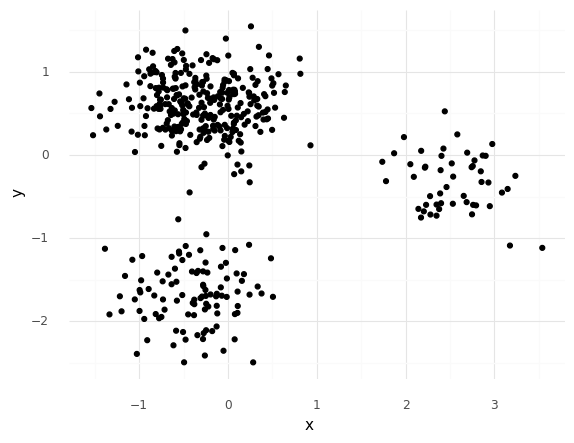

<ggplot: (84714159845)>

In [41]:
d5 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM5.csv")

z = StandardScaler()
d5[["x","y"]] = z.fit_transform(d5)

ggplot(d5, aes(x = "x", y = "y")) + geom_point() + theme_minimal()

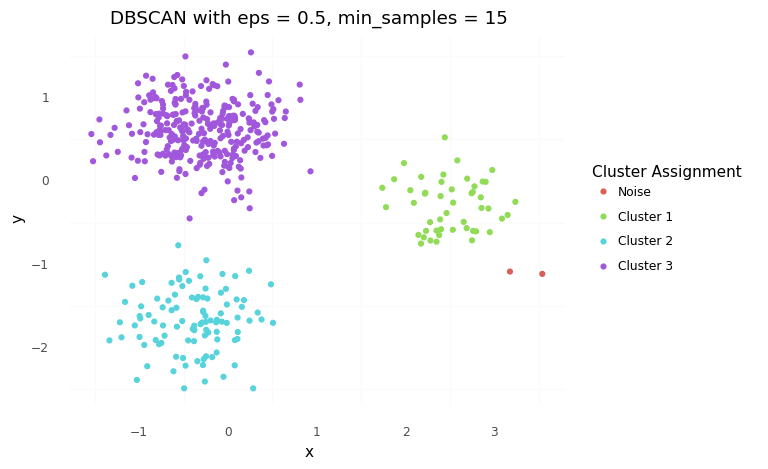

<ggplot: (84714410539)>

In [42]:
db5 = DBSCAN(eps = 0.5, min_samples = 15).fit(d5)

labsList = ["Noise"]
labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(db5.labels_)))]

d5["assignments"] = db5.labels_

(ggplot(d5, aes(x = "x", y = "y", color = "factor(assignments)")) +
 geom_point() +
 theme_minimal() +
 scale_color_discrete(name = "Cluster Assignment",
                      labels = labsList) +
theme(panel_grid_major = element_blank()) +
labs(title = "DBSCAN with eps = 0.5, min_samples = 15"))

In [43]:
# grab only clustered data points
d5_clustered = d5.loc[(d5.assignments >= 0)]

print(silhouette_score(d5_clustered[["x","y"]], d5_clustered["assignments"]))

# overall 
print(silhouette_score(d5[["x","y"]], d5["assignments"]))

0.7048131054311416
0.6714107830551044


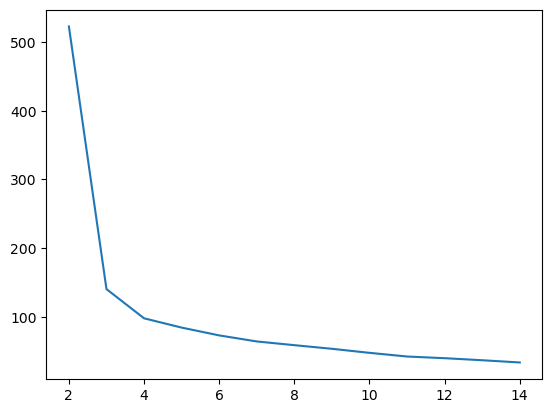

In [44]:
c5=[]
x =[]
for k in range(2,15):
    kmeans = KMeans(n_clusters=k, max_iter=50)
    kmeans.fit(d5)
    c5.append(kmeans.inertia_)
    x. append(k)
plt.plot(x,c5)

0.7043537508086658

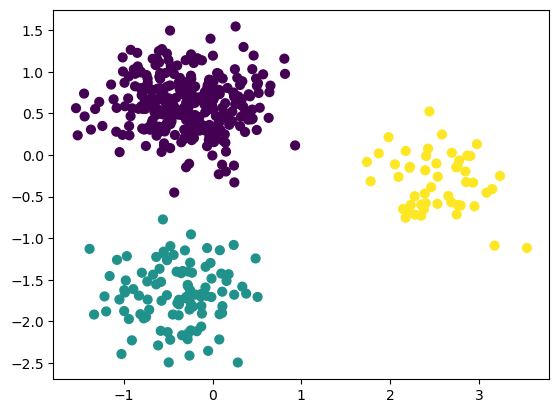

In [45]:
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(d5)

plt.scatter(d5["x"],d5["y"], c=kmeans.fit_predict(d5), s=40, cmap='viridis')
silhouette_score(d5[["x","y"]], kmeans.fit_predict(d5))

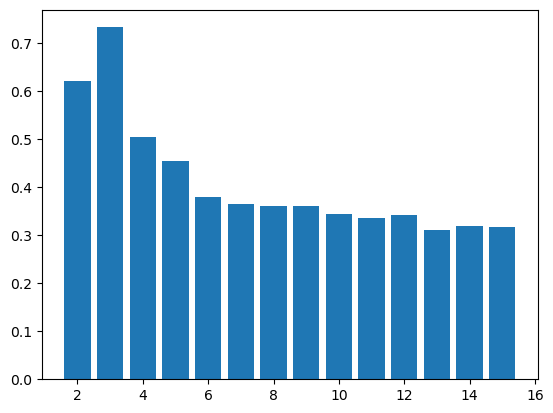

In [46]:
#training
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
silhouette_scores = [] 

for k in range(2, 16):
    silhouette_scores.append( 
        silhouette_score(d5, AgglomerativeClustering(n_clusters = k).fit_predict(d5))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7,8,9,10,11,12,13,14,15] 
plt.bar(k, silhouette_scores) 
plt.show() 

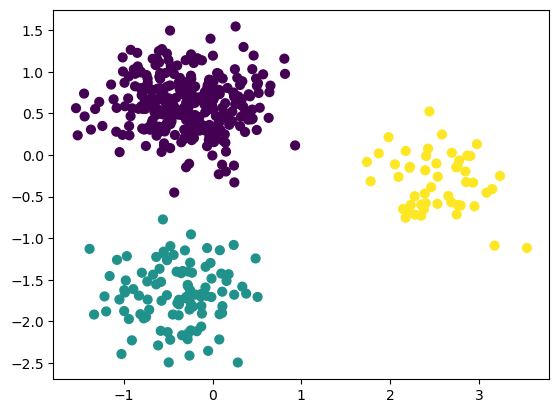

0.7332523249644806


In [47]:
agg=AgglomerativeClustering(n_clusters = 3)
plt.scatter(d5["x"],d5["y"], c=agg.fit_predict(d5), s=40, cmap='viridis')
plt.show()
print(silhouette_score(d5, AgglomerativeClustering(n_clusters = 3).fit_predict(d5)))
# the best one

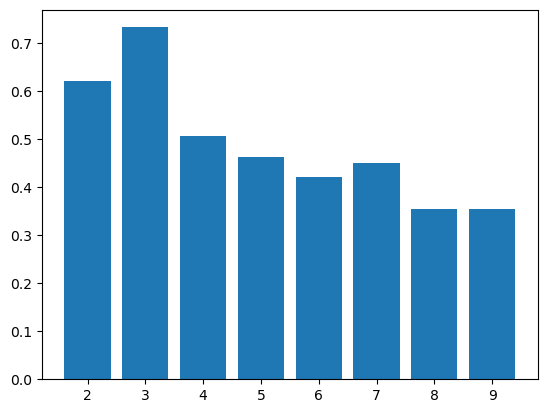

In [48]:
from sklearn.mixture import GaussianMixture
silhouette_scores2 =[]
ks = []  
for k in range(2,10) :
    gmm = GaussianMixture(n_components=k)
    gmm.fit(d5)
    labels = gmm.predict(d5)
    silhouette_scores2.append( 
        silhouette_score(d5,labels )) 
    ks.append(k)
    # Plotting a bar graph to compare the results 
k = [] 
plt.bar(ks, silhouette_scores2) 
plt.show()

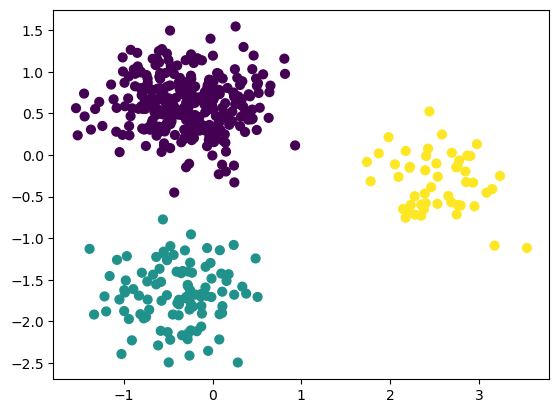

0.7332523249644806

In [49]:
gmm = GaussianMixture(n_components=3)
gmm.fit(d5)
labels = gmm.predict(d5)
plt.scatter(d5["x"],d5["y"], c=labels, s=40, cmap='viridis')
plt.show()
silhouette_score(d5,labels )

# Elbow Method

Read more [here](https://iopscience.iop.org/article/10.1088/1755-1315/31/1/012012/pdf) if math excites you.

## Dataset 6

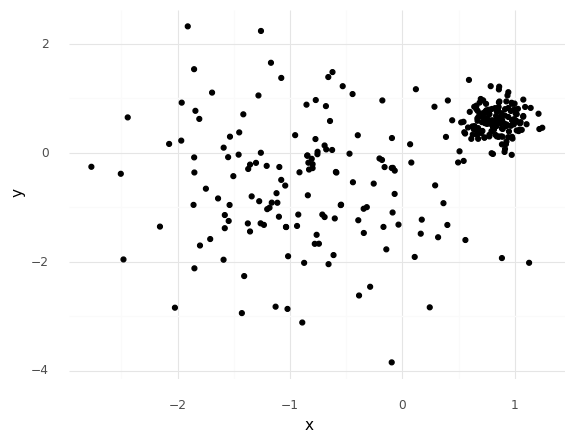

<ggplot: (84712090890)>

In [50]:
d6 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM6.csv")

z = StandardScaler()
d6[["x","y"]] = z.fit_transform(d6)

ggplot(d6, aes(x = "x", y = "y")) + geom_point() + theme_minimal()

In [51]:
# we ask for mins + 1 nearest, because the data point it self (distance = 0) is included
mins = 3
nn = NearestNeighbors(mins + 1)

nn.fit(d6[["x", "y"]])

distances, neighbors = nn.kneighbors(d6[["x", "y"]])

distances

TypeError: __init__() takes 1 positional argument but 2 were given

In [ ]:
# sort the distances
distances = np.sort(distances[:, mins], axis = 0)

NameError: name 'distances' is not defined

In [55]:
#plot the distances
distances_df = pd.DataFrame({"distances": distances,
                             "index": list(range(0,len(distances)))})
plt = (ggplot(distances_df, aes(x = "index", y = "distances")) +
 geom_line(color = "white", size = 2) + theme_minimal() +
 labs(title = "Elbow Method for Choosing eps") +
 theme(panel_grid_minor = element_blank(),
      rect = element_rect(fill = "#202124ff"),
      axis_text = element_text(color = "white"),
      axis_title = element_text(color = "white"),
      plot_title = element_text(color = "white"),
      panel_border = element_line(color = "darkgray"),
      plot_background = element_rect(fill = "#202124ff")
      ))
ggsave(plot=plt, filename='elbow.png', dpi=300)

plt

NameError: name 'distances' is not defined

In [ ]:
db6 = DBSCAN(eps = 0.45, min_samples = 3).fit(d6)

labsList = ["Noise"]
labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(db6.labels_)))]

d6["assignments"] = db6.labels_

(ggplot(d6, aes(x = "x", y = "y", color = "factor(assignments)")) +
 geom_point() +
 theme_minimal() +
 scale_color_discrete(name = "Cluster Assignment",
                      labels = labsList) +
theme(panel_grid_major = element_blank()) +
labs(title = "DBSCAN with eps = 0.9, min_samples = 15"))

In [ ]:
# grab only clustered data points
d6_clustered = d6.loc[(d6.assignments >= 0)]

print(silhouette_score(d6_clustered[["x","y"]], d6_clustered["assignments"]))

# overall 
print(silhouette_score(d6[["x","y"]], d6["assignments"]))

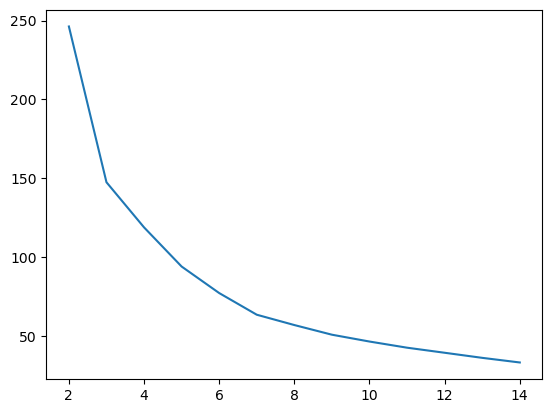

In [ ]:
cl=[]
x =[]
for k in range(2,15):
    kmeans = KMeans(n_clusters=k, max_iter=50)
    kmeans.fit(d6)
    cl.append(kmeans.inertia_)
    x. append(k)
plt.plot(x,cl)

0.5861497443577426

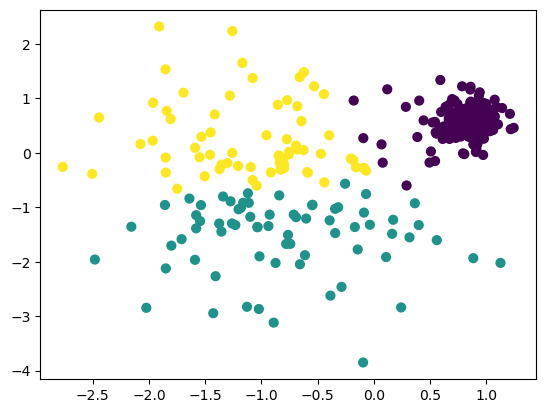

In [57]:
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(d6)

plt.scatter(d6["x"],d6["y"], c=kmeans.fit_predict(d6), s=40, cmap='viridis')
silhouette_score(d6[["x","y"]], kmeans.fit_predict(d6))
# the best one

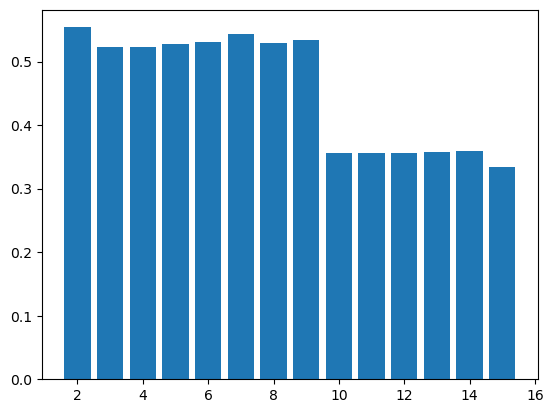

In [ ]:
#training
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
silhouette_scores = [] 

for k in range(2, 16):
    silhouette_scores.append( 
        silhouette_score(d6, AgglomerativeClustering(n_clusters = k).fit_predict(d6))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7,8,9,10,11,12,13,14,15] 
plt.bar(k, silhouette_scores) 
plt.show() 

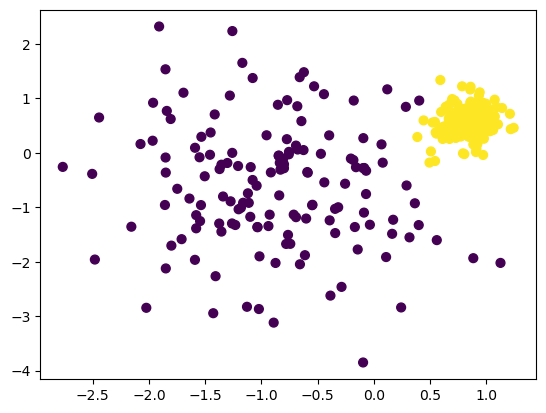

0.5538801329572542


In [ ]:
agg=AgglomerativeClustering(n_clusters = 2)
plt.scatter(d6["x"],d6["y"], c=agg.fit_predict(d6), s=40, cmap='viridis')
plt.show()
print(silhouette_score(d6, AgglomerativeClustering(n_clusters = 2).fit_predict(d6)))

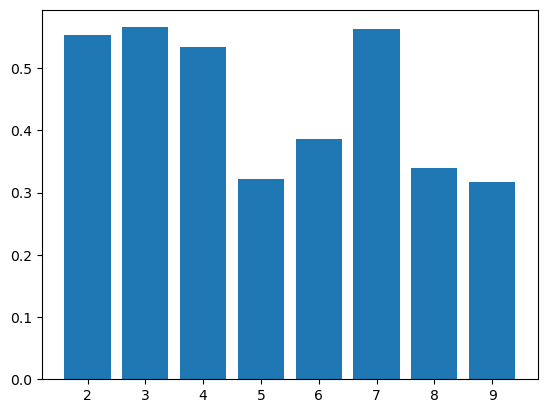

In [ ]:
from sklearn.mixture import GaussianMixture
silhouette_scores2 =[]
ks = []  
for k in range(2,10) :
    gmm = GaussianMixture(n_components=k)
    gmm.fit(d6)
    labels = gmm.predict(d6)
    silhouette_scores2.append( 
        silhouette_score(d6,labels )) 
    ks.append(k)
    # Plotting a bar graph to compare the results 
k = [] 
plt.bar(ks, silhouette_scores2) 
plt.show()

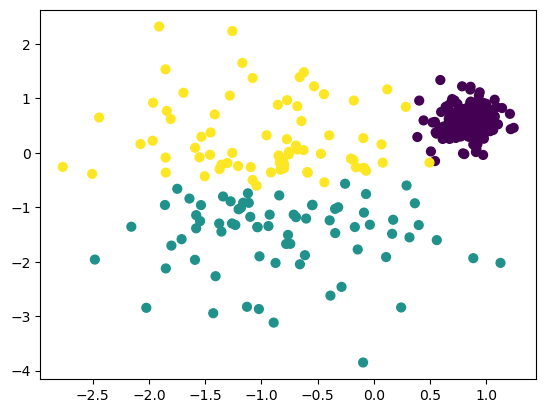

0.5697616522341274

In [ ]:
gmm = GaussianMixture(n_components=3)
gmm.fit(d6)
labels = gmm.predict(d6)
plt.scatter(d6["x"],d6["y"], c=labels, s=40, cmap='viridis')
plt.show()
silhouette_score(d6,labels )